
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [ ]:
student_number = '400100746'
first_name = 'Hossein'
last_name = 'Anjidani'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [ ]:
folder_path = '/content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q2'
# Read a CSV file from Drive
file_path = os.path.join(folder_path, 'spotify.csv')
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

**Answer:**
Importance of Standardizing Data
1. Equal Weight: Standardization ensures that each feature contributes equally to the distance measurements used in clustering algorithms. This prevents features with larger ranges from dominating the results.
2. Convergence: Many clustering algorithms, such as K-Means, converge faster when the data is standardized. Non-standardized data can lead to poor performance and longer training times.
3. Interpretability: Standardized data makes it easier to interpret the distances and the results of the clustering, as all features are on the same scale.

Complications Without Standardization
1. Dominant Features: Features with larger scales can dominate the distance metric, making the clustering algorithm biased towards these features.
2. Distorted Clusters: The shape and size of the clusters can be distorted if the features are on different scales.
3. Inefficient Algorithms: The efficiency and effectiveness of algorithms can be severely impacted, leading to suboptimal clustering results.

Implementing Standard Scaler
Let's implement a standard scaler from scratch and apply it to the spotify.csv dataset.

Steps:
1. Load the Data: Load the dataset from the CSV file.
2. Implement Standard Scaler: Write a function to standardize the data.
3. Apply the Scaler: Apply the scaler to the dataset.

In [ ]:
class StandardScalerFromScratch:
    def __init__(self):
        self.means = None
        self.stds = None

    def fit(self, X):
        # Calculate the mean and standard deviation for each feature
        self.means = X.mean(axis=0)
        self.stds = X.std(axis=0)

    def transform(self, X):
        # Standardize the data using the mean and std
        return (X - self.means) / self.stds

    def fit_transform(self, X):
        # Fit to the data and then transform it
        self.fit(X)
        return self.transform(X)

In [ ]:
# Select numerical columns for standardization
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_columns]

# Create an instance of the scaler and apply it to the numerical data
scaler = StandardScalerFromScratch()
standardized_data = scaler.fit_transform(numerical_data)

# Convert the standardized data back to a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=numerical_columns)

# Display the first few rows of the standardized data
standardized_df.head()

track_popularity  danceability    energy       key  loudness      mode  \
0          0.941517      0.642039  1.201596  0.173197  1.367103  0.876164   
1          0.981542      0.490404  0.643307  1.557603  0.585758  0.876164   
2          1.101619      0.138887  1.284510 -1.211209  1.100073 -1.141305   
3          0.701364      0.435264  1.278982  0.450078  0.984294  0.876164   
4          1.061593     -0.033425  0.742804 -1.211209  0.685141  0.876164   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0    -0.481355     -0.333893         -0.377947 -0.809217  0.031907  0.042926   
1    -0.688631     -0.468663         -0.359172  1.081044  0.782510 -0.777186   
2    -0.324417     -0.436792         -0.377843 -0.519554  0.439377  0.116225   
3    -0.050023     -0.667632         -0.377905  0.089580 -1.001780  0.039953   
4    -0.702450     -0.432694         -0.377947 -0.692574  0.919763  0.115035   

   duration_ms  
0    -0.518866  
1    -1.056252  
2    -0.822004  
3    -0.947735  
4    -0.614163

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

**Answer:**
Principal Component Analysis (PCA) is a popular technique for reducing the dimensionality of datasets while preserving as much variability as possible. This is achieved by transforming the original variables into a new set of variables, the principal components, which are orthogonal and capture the maximum variance in the data.

Steps:
1. Standardize the Data: Ensure that the data is standardized.
2. Apply PCA: Use PCA to reduce the dimensions of the data.
3. Determine the Number of Components: Use the explained variance ratio to determine the number of principal components to retain.

Let's proceed with the implementation using the spotify.csv dataset.


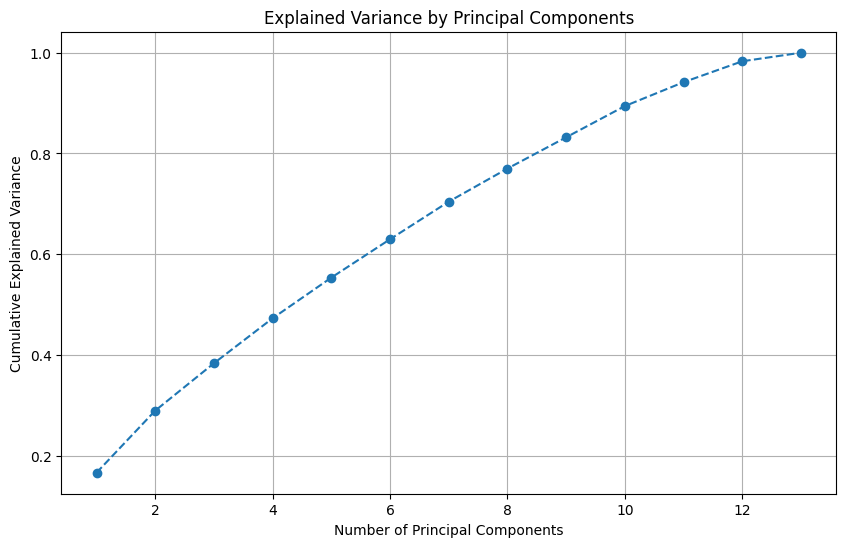

Number of principal components to retain for 95.0% explained variance: 12
Shape of the reduced data: (32833, 12)


In [ ]:
# Apply PCA
pca = PCA()
pca.fit(standardized_df)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio to determine the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Determine the number of components to retain (e.g., 95% explained variance)
explained_variance_cutoff = 0.95
cumulative_variance = explained_variance_ratio.cumsum()
num_components = next(i for i, total_variance in enumerate(cumulative_variance) if total_variance >= explained_variance_cutoff) + 1

print(f"Number of principal components to retain for {explained_variance_cutoff * 100}% explained variance: {num_components}")

# Transform the data using the determined number of components
pca = PCA(n_components=num_components)
reduced_data = pca.fit_transform(standardized_data)

# Display the shape of the reduced data
print(f"Shape of the reduced data: {reduced_data.shape}")

**Summary:**
* Standardization: The data was standardized to ensure that each feature
contributes equally to the PCA.
* PCA Application: PCA was applied to the standardized data.
* Explained Variance Ratio: The explained variance ratio was plotted to visually determine the number of components to retain.
* Component Selection: The number of principal components needed to retain 95% of the explained variance was determined.
* Transformation: The data was transformed using the selected number of components.

This process reduces the dimensionality of the dataset while retaining the majority of the variability, making subsequent analyses, such as clustering, more efficient and effective.

# Clustering

Implement K-means for clustering from scratch.
**Answer**
Implementing the K-means clustering algorithm from scratch involves several steps:

1. Initialize Centroids: Randomly initialize k centroids.
2. Assign Clusters: Assign each data point to the nearest centroid.
3. Update Centroids: Recompute the centroids as the mean of all data points assigned to each cluster.
4. Repeat: Repeat steps 2 and 3 until convergence (i.e., the centroids no longer change significantly).
Implementing K-means from Scratch

Let's proceed with the implementation using the spotify.csv dataset.

Steps:
1. Load the Data: Load and preprocess the data (standardization and PCA as previously done).
2. Implement K-means: Write a function to perform K-means clustering from scratch.
3. Apply K-means: Apply the K-means function to the reduced dataset.

First, we'll define the necessary functions for the K-means algorithm.

In [ ]:
class KMeansFromScratch:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape

        # Initialize centroids randomly from the data points
        np.random.seed(42)
        initial_indices = np.random.permutation(n_samples)[:self.n_clusters]
        self.centroids = X[initial_indices]

        for i in range(self.max_iter):
            # Assign clusters
            self.labels = self._assign_clusters(X)

            # Compute new centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def predict(self, X):
        return self._assign_clusters(X)

In [ ]:
# Create an instance of KMeansFromScratch and fit it to the reduced data
kmeans = KMeansFromScratch(n_clusters=3)
kmeans.fit(reduced_data)

# Get the cluster labels
labels = kmeans.predict(reduced_data)

# Add the cluster labels to the DataFrame
data['Cluster'] = labels

# Display the first few rows of the dataset with the cluster labels
data.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... loudness  mode  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -2.634     1   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -4.969     1   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.432     0   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.778     1   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -4.672     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0583        0.1020          0.000000    0.0653    0.518  122.036   
1       0.0373        0.0724          0.004210    0.3570    0.693   99.972   
2       0.0742        0.0794          0.000023    0.1100    0.613  124.008   
3       0.1020        0.0287          0.000009    0.2040    0.277  121.956   
4       0.0359        0.0803          0.000000    0.0833    0.725  123.976   

   duration_ms  Cluster  
0       194754        2  
1       162600        2  
2       176616        2  
3       169093        0  
4       189052        2  

[5 rows x 24 columns]

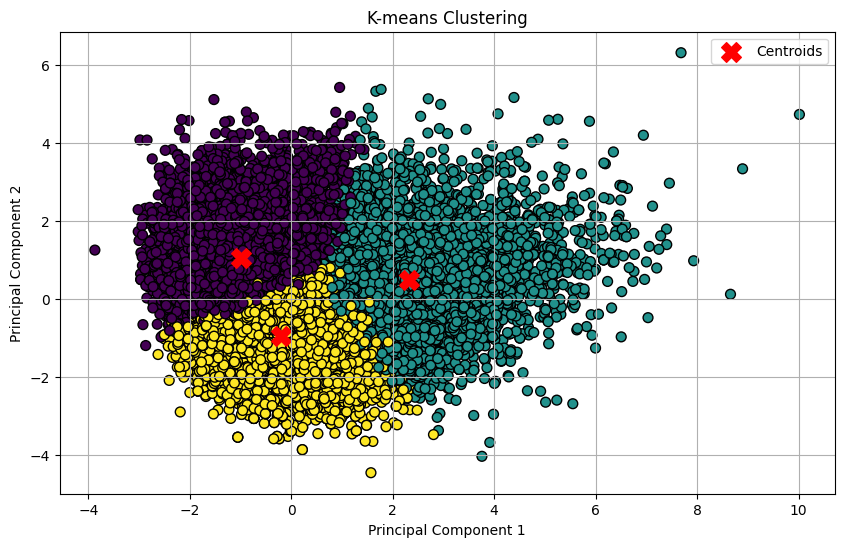

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

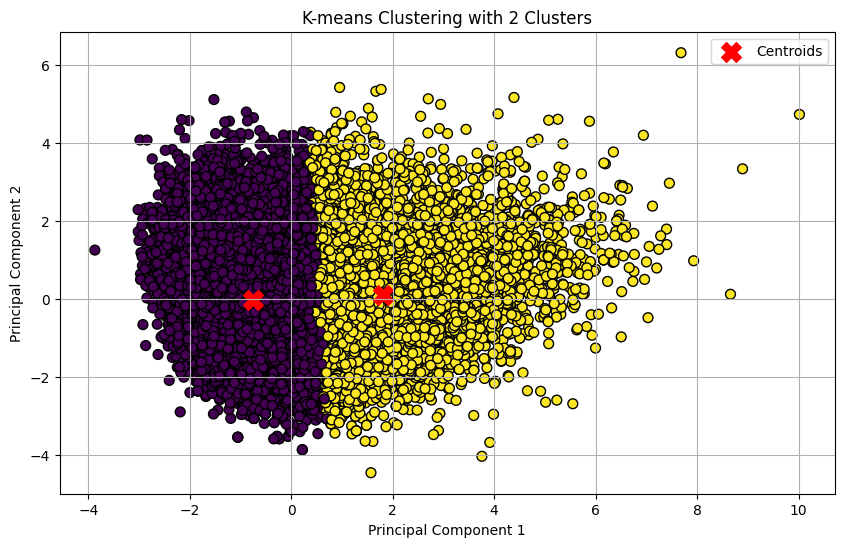

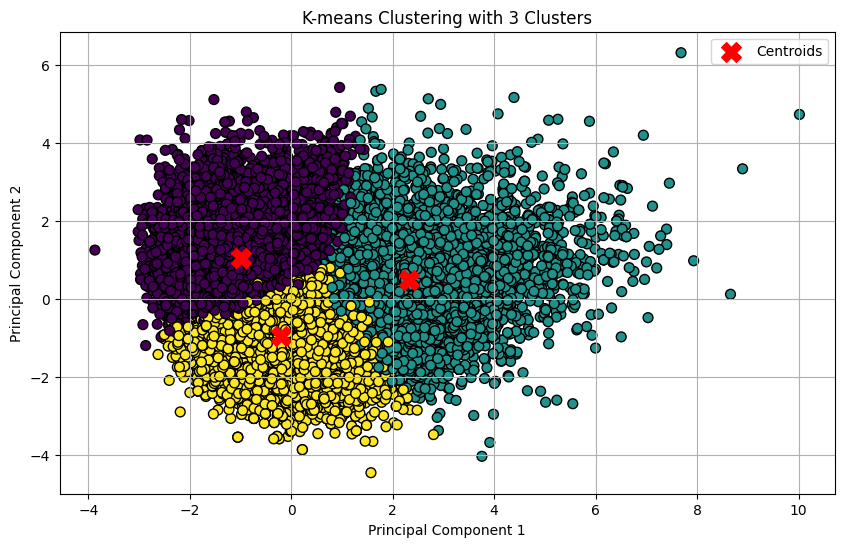

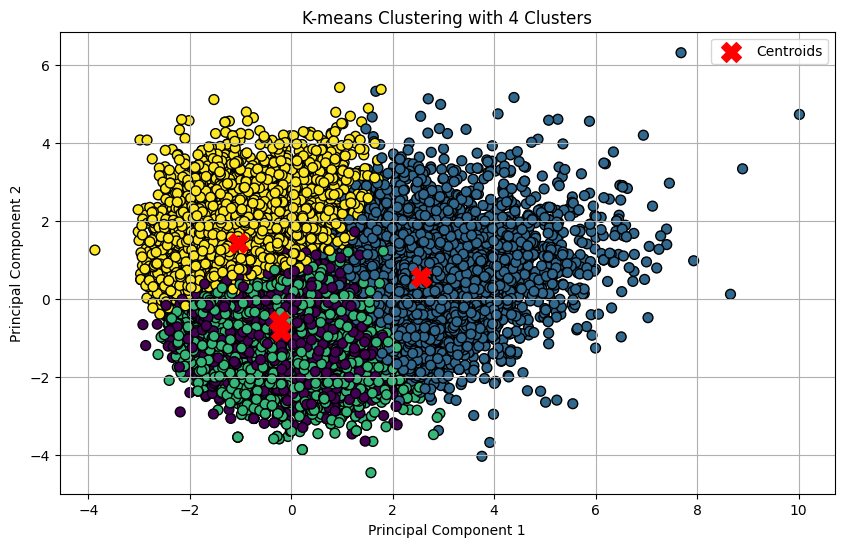

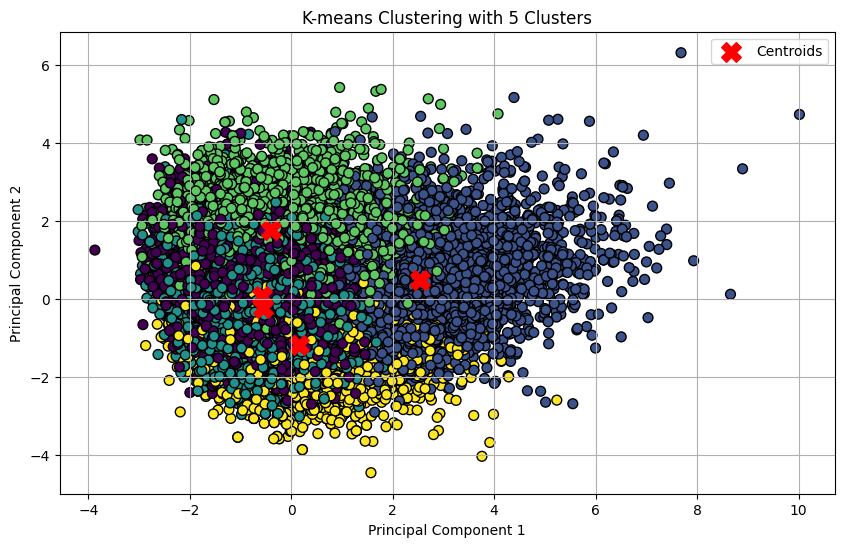

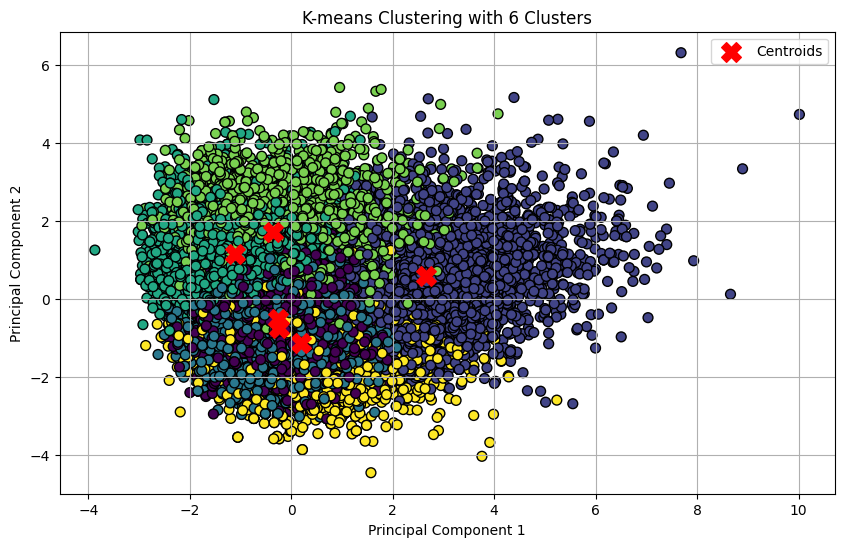

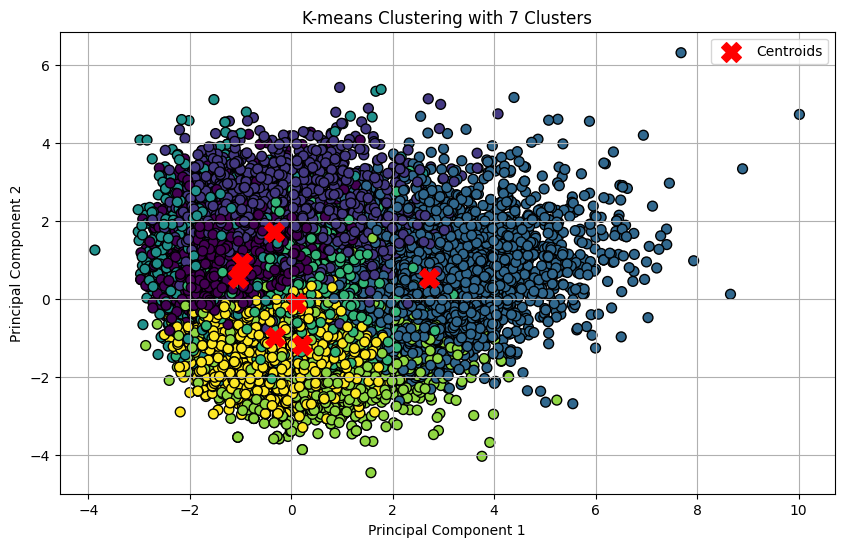

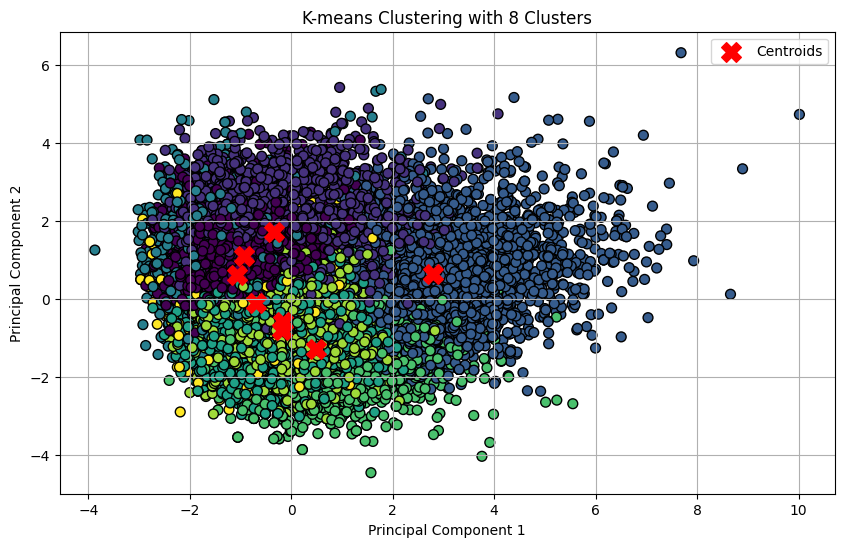

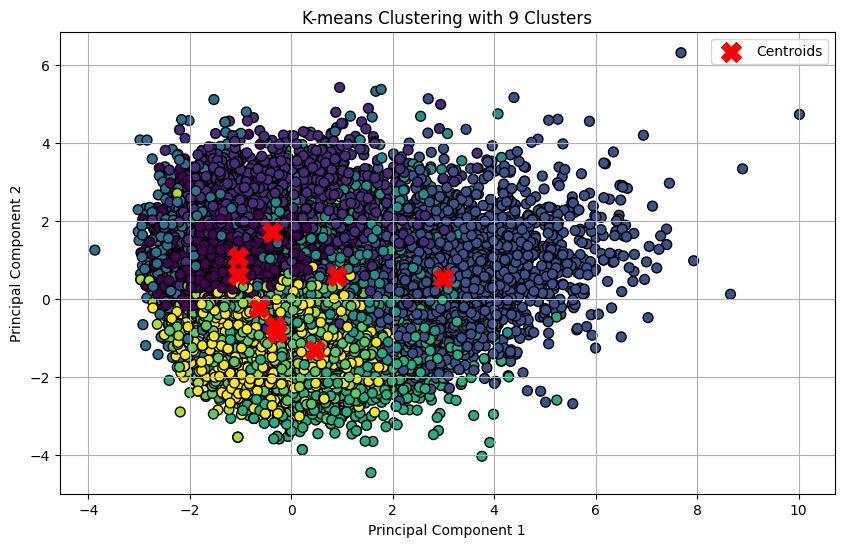

In [ ]:
genres = data['genre'] if 'genre' in data.columns else None
for n_clusters in range(2, 10):
    kmeans = KMeansFromScratch(n_clusters=n_clusters)
    kmeans.fit(reduced_data)
    labels = kmeans.predict(reduced_data)

    # Plot the results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.legend()
    plt.grid(True)

    # Annotate with genres if available
    if genres is not None:
        for i in range(n_clusters):
            # Find the indices of points in this cluster
            indices = np.where(labels == i)[0]
            # Find the most common genre in this cluster
            common_genre = genres.iloc[indices].mode()[0]
            # Place the genre label near the cluster centroid
            centroid = kmeans.centroids[i]
            plt.text(centroid[0], centroid[1], common_genre, fontsize=12, ha='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    plt.show()

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

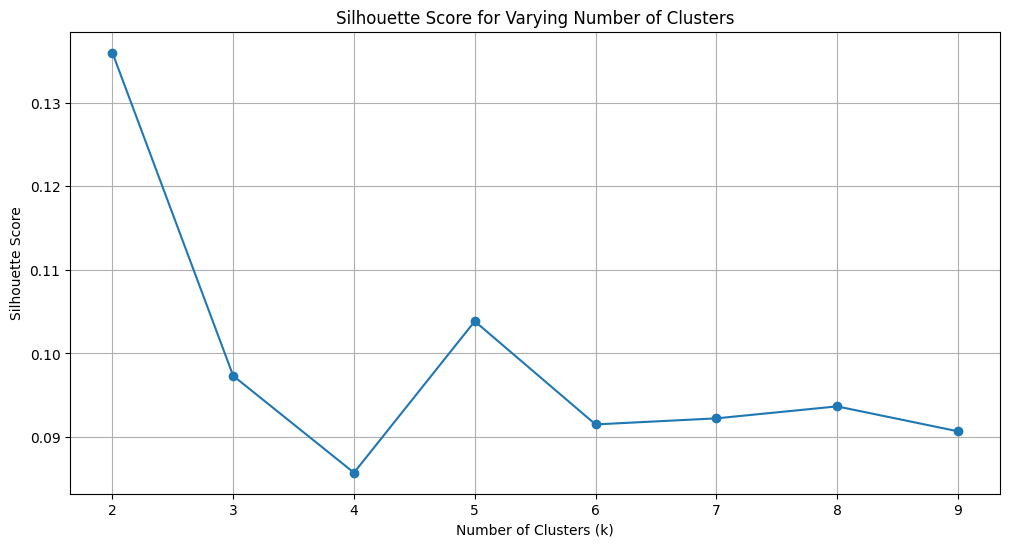

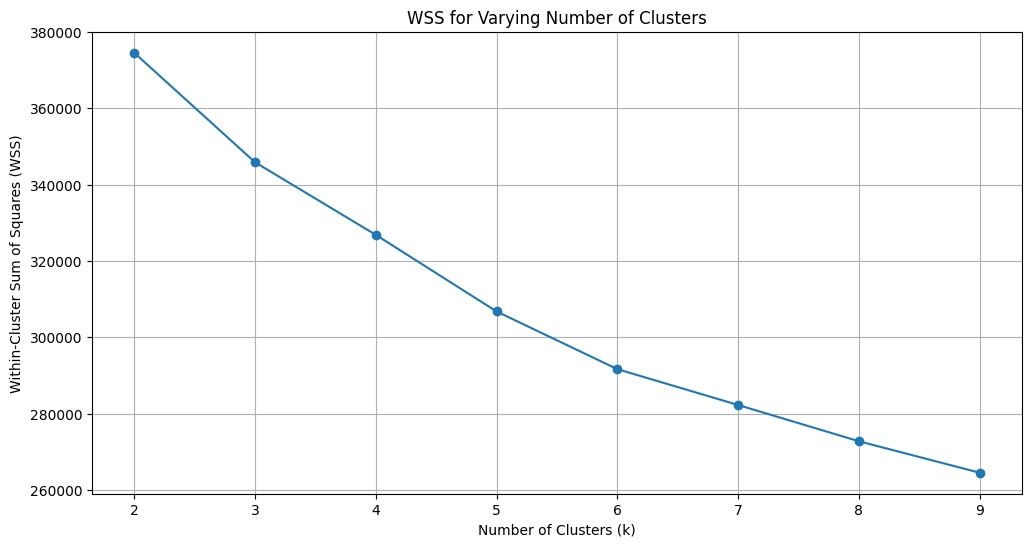

In [ ]:
def calculate_wss(X, labels, centroids):
    wss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        wss += np.sum((cluster_points - centroid) ** 2)
    return wss

silhouette_scores = []
wss_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeansFromScratch(n_clusters=k)
    kmeans.fit(reduced_data)
    labels = kmeans.predict(reduced_data)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(reduced_data, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate WSS
    wss = calculate_wss(reduced_data, labels, kmeans.centroids)
    wss_scores.append(wss)

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Varying Number of Clusters')
plt.grid(True)
plt.show()

# Plot WSS Scores
plt.figure(figsize=(12, 6))
plt.plot(k_values, wss_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('WSS for Varying Number of Clusters')
plt.grid(True)
plt.show()

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [ ]:
n_clusters = 3  # For example, choose 3 clusters
kmeans = KMeansFromScratch(n_clusters=n_clusters)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Add cluster labels to the original data
data['Cluster'] = labels

# Randomly select two songs from each cluster and calculate the distance
def random_sample_distance(data, labels, cluster):
    cluster_data = data[labels == cluster]
    if len(cluster_data) < 2:
        return None, None, None
    sample = cluster_data.sample(2, random_state=42)
    song1 = sample.iloc[0]
    song2 = sample.iloc[1]
    distance = np.linalg.norm(song1 - song2)
    return song1, song2, distance

# Calculate distances for each cluster
distances = {}
for cluster in range(n_clusters):
    song1, song2, distance = random_sample_distance(pd.DataFrame(reduced_data), labels, cluster)
    if song1 is not None and song2 is not None:
        distances[cluster] = distance
        print(f"Cluster {cluster}: Distance between selected songs: {distance}")

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(standardized_data)

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.legend(handles=scatter.legend_elements()[0], labels=set(labels))
plt.grid(True)
plt.show()

Cluster 0: Distance between selected songs: 6.22618564471335
Cluster 1: Distance between selected songs: 5.665778988713174
Cluster 2: Distance between selected songs: 3.6775631196070653


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

Cluster 0: Distance between selected songs: 6.22618564471335
Cluster 1: Distance between selected songs: 5.665778988713174
Cluster 2: Distance between selected songs: 3.6775631196070653


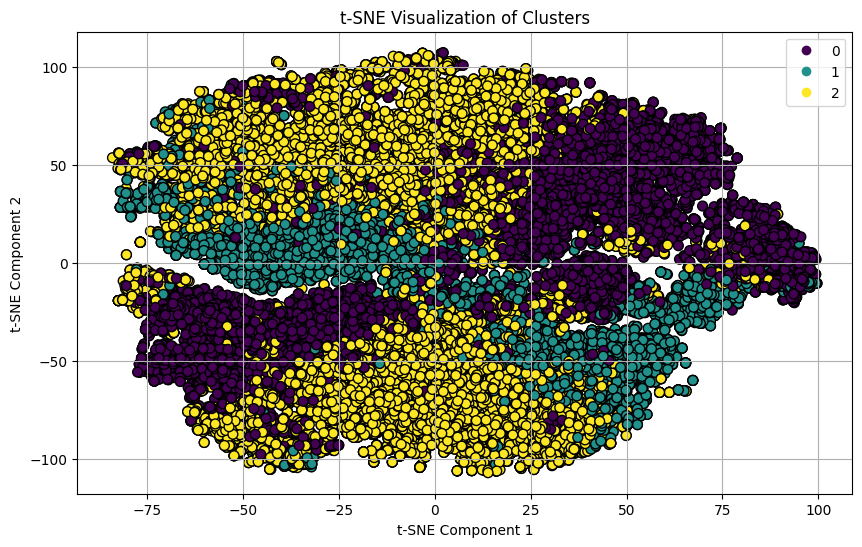

In [ ]:

# Apply K-means clustering
n_clusters = 3  # For example, choose 3 clusters
kmeans = KMeansFromScratch(n_clusters=n_clusters)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Add cluster labels to the original data
data['Cluster'] = labels

# Randomly select two songs from each cluster and calculate the distance
def random_sample_distance(data, labels, cluster):
    cluster_data = data[labels == cluster]
    if len(cluster_data) < 2:
        return None, None, None
    sample = cluster_data.sample(2, random_state=42)
    song1 = sample.iloc[0]
    song2 = sample.iloc[1]
    distance = np.linalg.norm(song1 - song2)
    return song1, song2, distance

# Calculate distances for each cluster
distances = {}
for cluster in range(n_clusters):
    song1, song2, distance = random_sample_distance(pd.DataFrame(reduced_data), labels, cluster)
    if song1 is not None and song2 is not None:
        distances[cluster] = distance
        print(f"Cluster {cluster}: Distance between selected songs: {distance}")

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(standardized_data)

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.legend(handles=scatter.legend_elements()[0], labels=set(labels))
plt.grid(True)
plt.show()